# 作业

利用感知机算法分类如下数据集

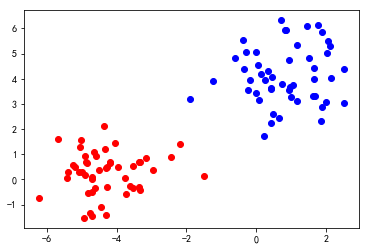

In [3]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets.samples_generator import make_circles
XX,yy = make_blobs(n_samples=100, centers=2, n_features=2,random_state=3)
#X X,yy = make_circles(n_samples=100,noise= 0.05,)
m = XX.shape[0]
plot(XX[np.where(yy == 1),0],XX[(np.where(yy == 1)),1],'ro');
plot(XX[np.where(yy == 0),0],XX[(np.where(yy == 0)),1],'bo');

In [2]:
import pandas as pd  # 导入库
import numpy as np
from pylab import plot, xlabel, ylabel, legend, figure, contour
%matplotlib inline     
#上行具体作用：当调用matplotlib.pyplot的绘图函数plot()进行绘图的时候，或者生成一个figure画布的时候，可以直接在python console里面生成图像。
import matplotlib # 注意这个也要import一次,原因不是很清楚
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# 使用Matplotlib的字体管理器加载中文字体
my_font=fm.FontProperties(fname="C:\Windows\Fonts\simsunb.ttf")
plt.rcParams['font.sans-serif']=['SimHei']

#解决负号'-'显示为方块的问题
matplotlib.rcParams['axes.unicode_minus'] = False

from sklearn import preprocessing
from sklearn import metrics


## 学习规则
感知机基础： 模仿大脑神经元

感知机的激活函数为阶跃函数：

\begin{equation}
sgn(x)=
\begin{cases}
1  & \text{x>0}\\
-1 & \text{otherwise}
\end{cases}
\end{equation}

假设训练集包含 $m$ 个样本，$\{x^i,y^i\}$, $i = 1, \cdots,m$, $x^i \in \mathbb{R}^n, y^i \in \{+1,-1\}$



$$\omega := \omega + \alpha (y^{i} - \hat{y}^{i})x^{i} $$

$\alpha$ 是学习率; $y^i$ 是第 $i$ 个样本的正确分类标签，$\hat{y}^i$ 是第 $i$ 个样本的预测标签。这个规则，逐个用到所有样本上。这个更新规则不必要求标签一定是 $+1$ 或 $-1$.

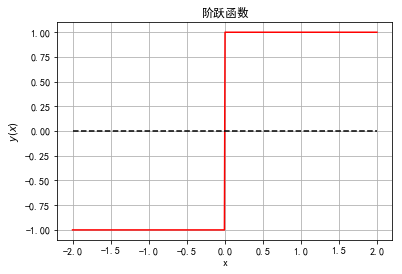

In [4]:
# plot step funciton
x = np.linspace(-2,2,500)
y = np.array(x > 0,dtype = np.int) # False --> 0; True --> 1
_ = np.where(y == 0) # array y 中 等于 0 的位置,可以直接引用
y[_]=y[_]-1 # 将 0 --> 1
plt.plot(x,y,"r-")
plt.plot(x,np.zeros(x.size),"k--")
plt.xlabel("x")
plt.ylabel("$y(x)$")
plt.title("阶跃函数")
plt.grid()

## 1.1  “学习”过程

### 1.1.1 训练集-逻辑门

In [5]:
def Perceptron_prediction(X,Omega):
    """Input the weigth and input of a perceptron.
       Return the predicted labels of all the smaples at once.
       output is a 2D array!
    """
    H = np.dot(X,Omega)
    y = np.array(H > 0,dtype= np.int) # 1--positive 0--negative
   # _ = np.where(y == 0)  
   # y[_] = y[_] - 1 # 将等于0的元设为 -1
    return y

Text(0, 0.5, '$x_2$')

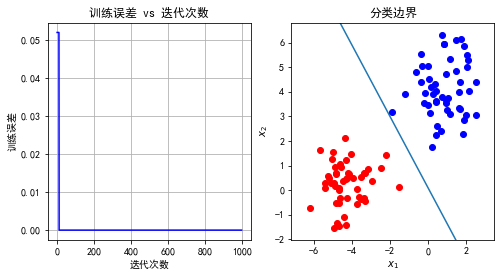

In [7]:
n_iter = 1000 # 迭代次数
alpha =1# 学习率
np.random.seed(42) # 锁定随机种子



# 注意：行号是样本指标，列号是维数

X = np.insert(XX,0,values=1,axis=1) # 将 1 插入到第一列（列指标为 0 ）
y = yy.reshape(-1,1) # change y to 2D array
Omega = np.random.rand(X.shape[1],1)# 

err = np.empty(n_iter)
for ii in np.arange(n_iter):
    i = np.random.randint(m) # 随机选择一个样本
    h = np.dot(X[i,:],Omega) 
    y_hat = np.array(h>0,dtype=np.int) # 一个样本的预测值
    Omega = Omega + alpha*(y[i,0]-y_hat)*X[i,:].reshape(Omega.shape) # 利用一个样本的预测值更新权重矢量。
    y_pred = Perceptron_prediction(X,Omega) # 预测所有样本 labels
    _ = np.dot((y - y_pred).T,(y - y_pred))[0,0]
    err[ii] = np.sqrt(_)/m

plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
plt.plot(err,"b-");
plt.title("训练误差 vs 迭代次数")
plt.xlabel("迭代次数")
plt.ylabel("训练误差")
#plt.ylim([-0.1,0.3]);
plt.grid()

# 画分类边界

plt.subplot(1,2,2)
x = np.linspace(np.min(X[:,1]-0.5),np.max(X[:,1]+0.5),20)
y1 = - Omega[1,0]/Omega[2,0]*x - Omega[0,0]/Omega[2,0]
plt.plot(x,y1)
plt.ylim([np.min(X[:,2]-0.5),np.max(X[:,2]+0.5)])


plot(XX[np.where(yy == 1),0],XX[(np.where(yy == 1)),1],'ro');
plot(XX[np.where(yy == 0),0],XX[(np.where(yy == 0)),1],'bo');
plt.title("分类边界");
xlabel('$x_1$')
ylabel('$x_2$')



# 2 利用感知机进行分类(三个类别)

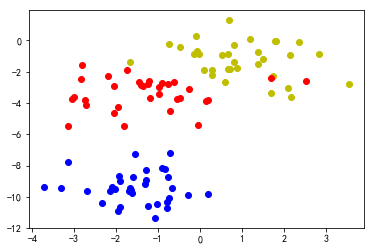

In [17]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets.samples_generator import make_circles
XX,yy = make_blobs(n_samples=100, centers=3, n_features=2,random_state=2)
m = XX.shape[0]
plt.plot(XX[np.where(yy == 0),0],XX[(np.where(yy == 0)),1],'bo');
plt.plot(XX[np.where(yy == 1),0],XX[(np.where(yy == 1)),1],'yo');
plt.plot(XX[np.where(yy == 2),0],XX[(np.where(yy == 2)),1],'ro');

## 2.1 三分类可以等于分类3个二分类

In [18]:
yy_1 = np.copy(yy)
yy_2 = np.copy(yy)
yy_3 = np.copy(yy)
yy_1[yy == 2] = 1
yy_2[yy == 1] = 0
yy_2[yy == 0] = 1
yy_2[yy == 2] = 1
yy_3[yy == 2] = 0
yy_3[yy == 0] = 1
def binary(n_iter, alpha, XX, yy):
    n_iter = 1000 # 迭代次数
    alpha =1# 学习率
    np.random.seed(42) # 锁定随机种子
    
    # 注意：行号是样本指标，列号是维数

    X = np.insert(XX,0,values=1,axis=1) # 将 1 插入到第一列（列指标为 0 ）
    y = yy.reshape(-1,1) # change y to 2D array
    Omega = np.random.rand(X.shape[1],1)# 
    err = np.empty(n_iter)
    for ii in np.arange(n_iter):
        i = np.random.randint(m) # 随机选择一个样本
        h = np.dot(X[i,:],Omega) 
        y_hat = np.array(h>0,dtype=np.int) # 一个样本的预测值
        Omega = Omega + alpha*(y[i,0]-y_hat)*X[i,:].reshape(Omega.shape) # 利用一个样本的预测值更新权重矢量。
        y_pred = Perceptron_prediction(X,Omega) # 预测所有样本 labels
        _ = np.dot((y - y_pred).T,(y - y_pred))[0,0]
        err[ii] = np.sqrt(_)/m
    return Omega

## 2.2 进行三次二分类

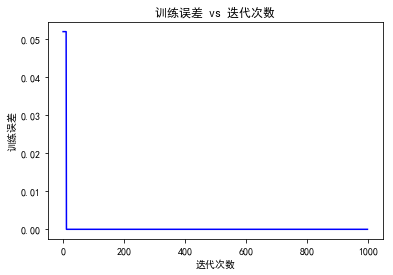

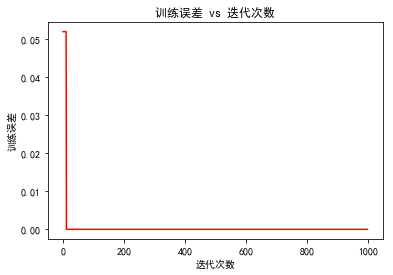

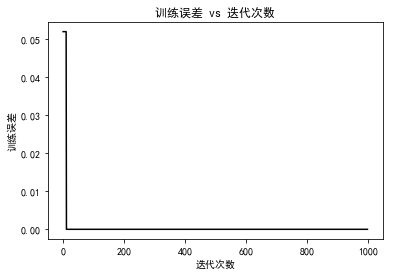

In [42]:
Omega1 = binary(n_iter, alpha, XX, yy_1)
plot(err,"b-");
plt.title("训练误差 vs 迭代次数")
xlabel("迭代次数")
ylabel("训练误差")
plt.show()

Omega2 = binary(n_iter, alpha, XX, yy_2)
plot(err,"r-");
plt.title("训练误差 vs 迭代次数")
xlabel("迭代次数")
ylabel("训练误差")
plt.show() 

Omega3 = binary(n_iter, alpha, XX, yy_3)
plot(err,"k-");
plt.title("训练误差 vs 迭代次数")
plt.xlabel("迭代次数")
plt.ylabel("训练误差")
plt.show()

## 2.3 画边界线

Text(0, 0.5, '$x_2$')

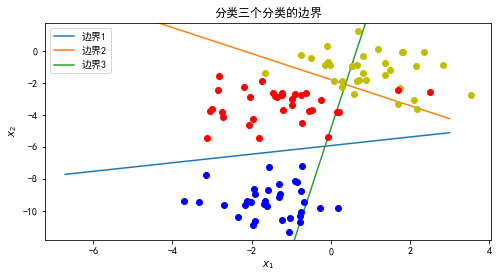

In [28]:
# 画分类边界

plt.figure(figsize = (8,4))
x = np.linspace(np.min(X[:,1]-0.5),np.max(X[:,1]+0.5),20)
y1 = - Omega1[1,0]/Omega1[2,0]*x - Omega1[0,0]/Omega1[2,0]
y2 = - Omega2[1,0]/Omega2[2,0]*x - Omega2[0,0]/Omega2[2,0]
y3 = - Omega3[1,0]/Omega3[2,0]*x - Omega3[0,0]/Omega3[2,0]
fig1, = plot(x,y1);
fig2, = plot(x,y2);
fig3, = plot(x,y3);
legend(handles=[fig1,fig2,fig3], labels=['边界1','边界2','边界3'])
 
plt.ylim([np.min(XX[:,1]-0.5),np.max(XX[:,1]+0.5)])

plt.plot(XX[np.where(yy == 0),0],XX[(np.where(yy == 0)),1],'bo');
plt.plot(XX[np.where(yy == 1),0],XX[(np.where(yy == 1)),1],'yo');
plt.plot(XX[np.where(yy == 2),0],XX[(np.where(yy == 2)),1],'ro');
plt.title("分类三个分类的边界");
xlabel('$x_1$')
ylabel('$x_2$')